## Exercise 1

Check out the [Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.80814&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). Explore the following:

   - The patterns learned by a neural net. Try training the default neural network by clicking the Run button (top left). Notice how it quickly finds a good solution for the classification task. The neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers there are, the more complex the patterns can be.
   
   - Activation functions. Try replacing the tanh activation function with a ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.
   - The risk of local minima. Modify the network architecture to have just one hidden layer with three neurons. Train it multiple times (to reset the network weights, click the Reset button next to the Play button). Notice that the training time varies a lot, and sometimes it even gets stuck in a local minimum.
   - What happens when neural nets are too small? Remove one neuron to keep just two. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and systematically underfits the training set.
   - What happens when neural nets are large enough? Set the number of neurons to eight, and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks rarely get stuck in local minima, and even when they do these local optima are often almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.
   - The risk of vanishing gradients in deep networks. Select the spiral dataset (the bottom-right dataset under “DATA”), and change the network architecture to have four hidden layers with eight neurons each. Notice that training takes much longer and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (on the right) tend to evolve faster than the neurons in the lowest layers (on the left). This problem, called the vanishing gradients problem, can be alleviated with better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or batch normalization. (discussed in Chapter 11 in the book).

## Exercise 2

Take a few moments to play with the following code.  Try using the different activation functions (`identity`,`tanh`,`logistic`,`relu`) and solvers (`lbfgs`,`sgd`,`adam`).  Try reconfiguring the size and number of hidden layers.  Try changing the number of classes in your sample data. What do you find? Can you identify a good configuration for 10 classes?



In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=10, random_state=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(75,20), max_iter=1000, alpha=1e-4,
                    solver='sgd', activation="relu", verbose=10, random_state=1,
                    learning_rate_init=.05)

# Train the MLP
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Iteration 1, loss = 2.50740824
Iteration 2, loss = 2.24232418
Iteration 3, loss = 2.10439910
Iteration 4, loss = 1.99862156
Iteration 5, loss = 1.89582390
Iteration 6, loss = 1.79658236
Iteration 7, loss = 1.70515257
Iteration 8, loss = 1.61576752
Iteration 9, loss = 1.55181395
Iteration 10, loss = 1.47151747
Iteration 11, loss = 1.39894158
Iteration 12, loss = 1.33974524
Iteration 13, loss = 1.27806798
Iteration 14, loss = 1.22366524
Iteration 15, loss = 1.16032015
Iteration 16, loss = 1.10268154
Iteration 17, loss = 1.04874687
Iteration 18, loss = 0.99494592
Iteration 19, loss = 0.95577610
Iteration 20, loss = 0.90812470
Iteration 21, loss = 0.86548117
Iteration 22, loss = 0.82138077
Iteration 23, loss = 0.76926152
Iteration 24, loss = 0.73686544
Iteration 25, loss = 0.70781486
Iteration 26, loss = 0.66232101
Iteration 27, loss = 0.62995076
Iteration 28, loss = 0.59282779
Iteration 29, loss = 0.55616153
Iteration 30, loss = 0.51499904
Iteration 31, loss = 0.47811643
Iteration 32, los

logistic: Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 0.45
identity: Accuracy: 0.28
tanh: Accuracy: 0.41
relu: Accuracy: 0.48
best: 
not true: the bigger the network is, the better the accuracy is. 

## Exercise 3 

Try building a MLP in Keras to fit the MNIST handwriting data using the Sequential API. Here are some tips:

- Make sure to flatten your images with a "Flatten" layer
- Add one or two Dense layers with ReLU activation
- Finish with a dense output layer with 10 neurons (one for each digit)
- Compile the model with the `adam` optimizer, `sparse_categorical_crossentropy` loss, and `accuracy` metric
- Use a validation_split parameter with 20 percent of your data for validation during training
- Train with a reasonable number of epochs (e.g. 5-10) and evaluate your performance on the test set
- Explore with different numbers of neurons, layers, and epochs!


In [24]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 21.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 52.1 MB/s eta 0:00:00:00:01
   ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  1/25 [libclang]  WARNING: The script wheel is installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━ 13/25 [markdown]m]-data-server]  WARNING: The

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import numpy as np

#Just to get you started, here's some data!
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tensorflows data is from 0-255, so here we just normalize to the 0-1 range:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import numpy as np

# Check the data shape
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Build the model using Sequential API
model = Sequential([
    # Flatten 28x28 images to 784-dimensional vector
    Flatten(input_shape=(28, 28)),
    
    # First hidden layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),
    
    # Optional: Add dropout for regularization
    Dropout(0.2),
    
    # Second hidden layer with 64 neurons
    Dense(64, activation='relu'),
    
    # Output layer with 10 neurons (one per digit) and softmax activation
    Dense(10, activation='softmax')
])

# Display model architecture
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
print("\nTraining the model...")
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,  # Use 20% of training data for validation
    batch_size=128,
    verbose=1
)

# Evaluate on test set
print("\nEvaluating on test set...")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make some predictions
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
print(f"\nFirst 5 predictions: {predicted_classes}")
print(f"Actual labels: {y_test[:5]}")

2025-11-05 16:33:44.464202: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-05 16:33:45.406559: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-05 16:33:47.705499: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-11-05 16:33:52.068851: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/10


2025-11-05 16:33:52.427242: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7676 - loss: 0.7708

2025-11-05 16:33:54.572744: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 37632000 exceeds 10% of free system memory.


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8725 - loss: 0.4343 - val_accuracy: 0.9467 - val_loss: 0.1848
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9442 - loss: 0.1876 - val_accuracy: 0.9631 - val_loss: 0.1282
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9594 - loss: 0.1344 - val_accuracy: 0.9663 - val_loss: 0.1077
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9667 - loss: 0.1096 - val_accuracy: 0.9710 - val_loss: 0.0966
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.0920 - val_accuracy: 0.9726 - val_loss: 0.0870
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0785 - val_accuracy: 0.9735 - val_loss: 0.0858
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9785 - loss: 0.0677 - val_accuracy: 0.9744 - val_loss: 0.0855
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9810 - loss: 0.0619 - val_accuracy: 0.9753 - val_

2025-11-05 16:34:06.579375: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


Test Loss: 0.0731
Test Accuracy: 0.9766
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

First 5 predictions: [7 2 1 0 4]
Actual labels: [7 2 1 0 4]


# Exercise 4: Multi-Input Networks for Mixed Data Types

In this exercise, you'll build a network that processes both numerical and categorical data to predict car prices using the Auto MPG dataset. You'll implement different architectures for processing each type of data and combine them effectively.

## Setup


In [ ]:

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Load and prepare the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin', 'Car Name']

# Load the raw data
df = pd.read_csv(url, names=column_names,
                 na_values='?', comment='\t',
                 sep=' ', skipinitialspace=True)

# Clean the data
df = df.dropna()

# Separate features
numeric_features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']
categorical_features = ['Model Year', 'Origin']
target = 'MPG'

# Create inputs
numeric_data = df[numeric_features]
categorical_data = df[categorical_features]
target_data = df[target]

# Split the data
X_num_train_full, X_num_test, X_cat_train_full, X_cat_test, y_train_full, y_test = train_test_split(
    numeric_data, categorical_data, target_data, test_size=0.2, random_state=42)

X_num_train, X_num_valid, X_cat_train, X_cat_valid, y_train, y_valid = train_test_split(
    X_num_train_full, X_cat_train_full, y_train_full, test_size=0.2, random_state=42)

# Scale numeric data
scaler = StandardScaler()
X_num_train_scaled = scaler.fit_transform(X_num_train)
X_num_valid_scaled = scaler.transform(X_num_valid)
X_num_test_scaled = scaler.transform(X_num_test)

# Encode categorical data
encoder = OneHotEncoder(sparse=False)
X_cat_train_encoded = encoder.fit_transform(X_cat_train)
X_cat_valid_encoded = encoder.transform(X_cat_valid)
X_cat_test_encoded = encoder.transform(X_cat_test)

# Utility function for plotting training history
def plot_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.set_title('Training and Validation Loss')
    ax1.grid(True)
    
    ax2.plot(history.history['mape'], label='Training MAPE')
    ax2.plot(history.history['val_mape'], label='Validation MAPE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MAPE')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()



ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.


## Part 1: Basic Multi-Input Model

Create a basic multi-input model that processes numeric and categorical data separately:


In [ ]:


def create_basic_multi_input_model(num_features, cat_features):
    # TODO: Create a model with:
    # - One input branch for numeric features
    # - One input branch for categorical features
    # - Dense layers for each branch
    # - Concatenated outputs
    # - Final prediction layer
    # Return both the model and its inputs
    return None, None

# Create and compile the model
num_features = X_num_train_scaled.shape[1]
cat_features = X_cat_train_encoded.shape[1]

model, inputs = create_basic_multi_input_model(num_features, cat_features)
model.compile(optimizer='adam', loss='mse', metrics=['mape'])

# Train the model
history = model.fit(
    [X_num_train_scaled, X_cat_train_encoded],
    y_train,
    validation_data=([X_num_valid_scaled, X_cat_valid_encoded], y_valid),
    epochs=50
)

plot_learning_curves(history)



IndentationError: unexpected indent (365258959.py, line 14)

/tmp/ipykernel_11782/1619705464.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')


Initial dataset size: 398
Dataset size after dropping NAs: 392
Training set size: 250
Validation set size: 63
Test set size: 79

Number of numeric features: 5
Number of categorical features (after encoding): 16


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ numeric_input       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ categorical_input   │ (None, 16)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_dense1      │ (None, 64)        │        384 │ numeric_input[0]… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ categorical_dense1  │ (None, 32)        │        544 │ categorical_inpu… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_dense2      │ (None, 32)        │      2,080 │ numeric_dense1[0… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ categorical_dense2  │ (None, 16)        │        528 │ categorical_dens… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 48)        │          0 │ numeric_dense2[0… │
│ (Concatenate)       │                   │            │ categorical_dens… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_dense1     │ (None, 32)        │      1,568 │ concatenate[0][0] │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ combined_dense2     │ (None, 16)        │        528 │ combined_dense1[… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         17 │ combined_dense2[… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,649 (22.07 KB)

 Trainable params: 5,649 (22.07 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 619.8752 - mape: 99.1500 - val_loss: 565.9280 - val_mape: 98.1368
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 594.3431 - mape: 96.8747 - val_loss: 538.3677 - val_mape: 95.4662
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 558.3317 - mape: 93.3214 - val_loss: 495.7460 - val_mape: 90.9180
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 501.8521 - mape: 87.0696 - val_loss: 430.1494 - val_mape: 83.2185
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 417.4608 - mape: 76.6606 - val_loss: 335.8651 - val_mape: 70.6820
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 299.5529 - mape: 59.8519 - val_loss: 217.1535 - val_mape: 52.1886
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 172.2742 - mape: 45.2555 - val_loss: 108.1933 - val_mape: 38.3261
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 74.2284 - mape: 33.9012 - val_loss: 48.8880 - val_mape: 26.9533
E

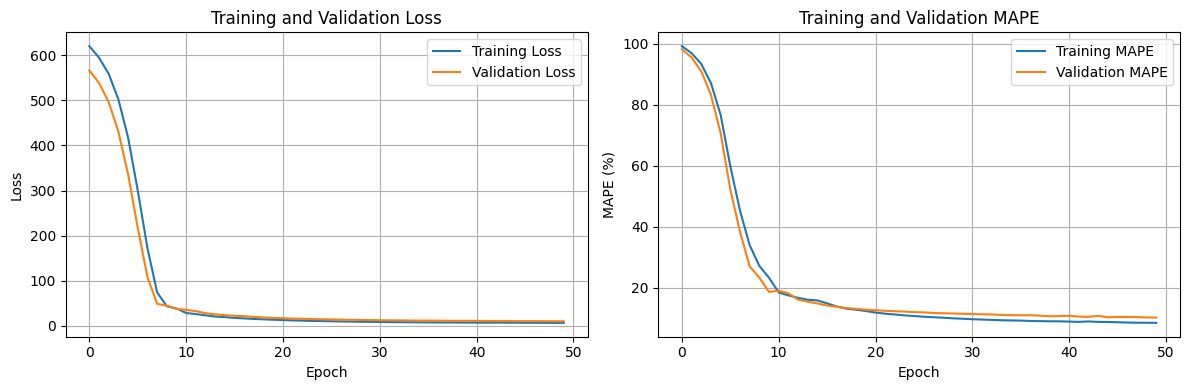


Evaluating on test set...
Test MSE Loss: 7.0556
Test MAPE: 8.70%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

Sample predictions vs actual:
Predicted: 25.30 MPG, Actual: 26.00 MPG
Predicted: 23.61 MPG, Actual: 21.60 MPG
Predicted: 36.30 MPG, Actual: 36.10 MPG
Predicted: 29.52 MPG, Actual: 26.00 MPG
Predicted: 28.61 MPG, Actual: 27.00 MPG


In [30]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout

# Load and prepare the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin', 'Car Name']

# Load the raw data with proper parameters
df = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

print(f"Initial dataset size: {len(df)}")

# Clean the data
df = df.dropna()
print(f"Dataset size after dropping NAs: {len(df)}")

# Drop the car name column as it's not useful for prediction
df = df.drop('Car Name', axis=1)

# Separate features
numeric_features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']
categorical_features = ['Model Year', 'Origin']
target = 'MPG'

# Create inputs
numeric_data = df[numeric_features].values
categorical_data = df[categorical_features].values
target_data = df[target].values

# Split the data
X_num_train_full, X_num_test, X_cat_train_full, X_cat_test, y_train_full, y_test = train_test_split(
    numeric_data, categorical_data, target_data, test_size=0.2, random_state=42)

X_num_train, X_num_valid, X_cat_train, X_cat_valid, y_train, y_valid = train_test_split(
    X_num_train_full, X_cat_train_full, y_train_full, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_num_train)}")
print(f"Validation set size: {len(X_num_valid)}")
print(f"Test set size: {len(X_num_test)}")

# Scale numeric data
scaler = StandardScaler()
X_num_train_scaled = scaler.fit_transform(X_num_train)
X_num_valid_scaled = scaler.transform(X_num_valid)
X_num_test_scaled = scaler.transform(X_num_test)

# Encode categorical data
encoder = OneHotEncoder(sparse_output=False)
X_cat_train_encoded = encoder.fit_transform(X_cat_train)
X_cat_valid_encoded = encoder.transform(X_cat_valid)
X_cat_test_encoded = encoder.transform(X_cat_test)

# Utility function for plotting training history
def plot_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(history.history['mape'], label='Training MAPE')
    ax2.plot(history.history['val_mape'], label='Validation MAPE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MAPE (%)')
    ax2.set_title('Training and Validation MAPE')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

## Part 1: Basic Multi-Input Model

def create_basic_multi_input_model(num_features, cat_features):
    """
    Create a basic multi-input model that processes numeric and categorical data separately.
    
    Args:
        num_features: Number of numeric features
        cat_features: Number of categorical features (after one-hot encoding)
    
    Returns:
        model: Compiled Keras model
        inputs: List of input layers [numeric_input, categorical_input]
    """
    # Input layer for numeric features
    numeric_input = Input(shape=(num_features,), name='numeric_input')
    
    # Input layer for categorical features
    categorical_input = Input(shape=(cat_features,), name='categorical_input')
    
    # Process numeric features through dense layers
    numeric_branch = Dense(64, activation='relu', name='numeric_dense1')(numeric_input)
    numeric_branch = Dense(32, activation='relu', name='numeric_dense2')(numeric_branch)
    
    # Process categorical features through dense layers
    categorical_branch = Dense(32, activation='relu', name='categorical_dense1')(categorical_input)
    categorical_branch = Dense(16, activation='relu', name='categorical_dense2')(categorical_branch)
    
    # Concatenate both branches
    concatenated = Concatenate(name='concatenate')([numeric_branch, categorical_branch])
    
    # Additional dense layers after concatenation
    x = Dense(32, activation='relu', name='combined_dense1')(concatenated)
    x = Dense(16, activation='relu', name='combined_dense2')(x)
    
    # Output layer for regression (single value - MPG prediction)
    output = Dense(1, name='output')(x)
    
    # Create the model
    model = Model(inputs=[numeric_input, categorical_input], outputs=output)
    
    return model, [numeric_input, categorical_input]

# Create and compile the model
num_features = X_num_train_scaled.shape[1]
cat_features = X_cat_train_encoded.shape[1]

print(f"\nNumber of numeric features: {num_features}")
print(f"Number of categorical features (after encoding): {cat_features}")

model, inputs = create_basic_multi_input_model(num_features, cat_features)

# Display model architecture
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mape'])

# Train the model
print("\nTraining the model...")
history = model.fit(
    [X_num_train_scaled, X_cat_train_encoded],
    y_train,
    validation_data=([X_num_valid_scaled, X_cat_valid_encoded], y_valid),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Plot learning curves
plot_learning_curves(history)

# Evaluate on test set
print("\nEvaluating on test set...")
test_loss, test_mape = model.evaluate(
    [X_num_test_scaled, X_cat_test_encoded], 
    y_test, 
    verbose=0
)
print(f"Test MSE Loss: {test_loss:.4f}")
print(f"Test MAPE: {test_mape:.2f}%")

# Make some predictions
sample_predictions = model.predict([X_num_test_scaled[:5], X_cat_test_encoded[:5]])
print(f"\nSample predictions vs actual:")
for i in range(5):
    print(f"Predicted: {sample_predictions[i][0]:.2f} MPG, Actual: {y_test[i]:.2f} MPG")


## Part 2: Enhanced Multi-Input Model with Different Branch Depths

Create a more sophisticated model with different architectures for numeric and categorical data:


In [ ]:

def create_enhanced_multi_input_model(num_features, cat_features):
    # TODO: Create a model with:
    # - Deep branch for numeric features (3+ layers)
    # - Shallow branch for categorical features (1-2 layers)
    # - Batch normalization in numeric branch
    # - Dropout in both branches
    # - Skip connection in numeric branch
    # Return both the model and its inputs
    return None, None

# Create and compile the enhanced model
model_enhanced, inputs_enhanced = create_enhanced_multi_input_model(num_features, cat_features)
model_enhanced.compile(optimizer='adam', loss='mse', metrics=['mape'])

# Train the enhanced model
history_enhanced = model_enhanced.fit(
    [X_num_train_scaled, X_cat_train_encoded],
    y_train,
    validation_data=([X_num_valid_scaled, X_cat_valid_encoded], y_valid),
    epochs=50
)

plot_learning_curves(history_enhanced)



## Part 3: Adding Auxiliary Outputs

Modify your enhanced model to include auxiliary outputs for regularization:


In [ ]:


def create_multi_output_model(num_features, cat_features):
    # TODO: Create a model with:
    # - Similar structure to enhanced model
    # - Auxiliary output from numeric branch
    # - Auxiliary output from categorical branch
    # - Main output from combined features
    # Return model and inputs
    return None, None

# Create and compile the multi-output model
model_multi_output, inputs_multi_output = create_multi_output_model(num_features, cat_features)
model_multi_output.compile(
    optimizer='adam',
    loss=['mse', 'mse', 'mse'],
    loss_weights=[0.7, 0.15, 0.15],
    metrics=['mape']
)

# Train the multi-output model
history_multi_output = model_multi_output.fit(
    [X_num_train_scaled, X_cat_train_encoded],
    [y_train, y_train, y_train],
    validation_data=(
        [X_num_valid_scaled, X_cat_valid_encoded],
        [y_valid, y_valid, y_valid]
    ),
    epochs=50
)

plot_learning_curves(history_multi_output)




## Part 4: Model Comparison and Analysis

Compare the performance of all three models:


In [ ]:

def compare_models(models, histories, X_test_data, y_test_data):
    # TODO: Create a comparison including:
    # - Test set performance
    # - Training time
    # - Number of parameters
    # - Best validation performance
    # Return a pandas DataFrame with results
    return None

# Example usage:
models = {
    'Basic': model,
    'Enhanced': model_enhanced,
    'Multi-Output': model_multi_output
}

histories = {
    'Basic': history,
    'Enhanced': history_enhanced,
    'Multi-Output': history_multi_output
}

comparison_df = compare_models(
    models, histories,
    [X_num_test_scaled, X_cat_test_encoded],
    y_test
)
print(comparison_df)

# TODO: Create visualizations comparing:
# 1. Learning curves for all models
# 2. Prediction accuracy on test set
# 3. Training time comparison

